# DATA COLLECTION

In [1]:
import pandas as pd

train = pd.read_csv('train_sales.csv')
test = pd.read_csv('test_sales.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

print(train.head())
print(test.head())
print(features.head())
print(stores.head())


   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
   Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown

# Data exploration and Visualization

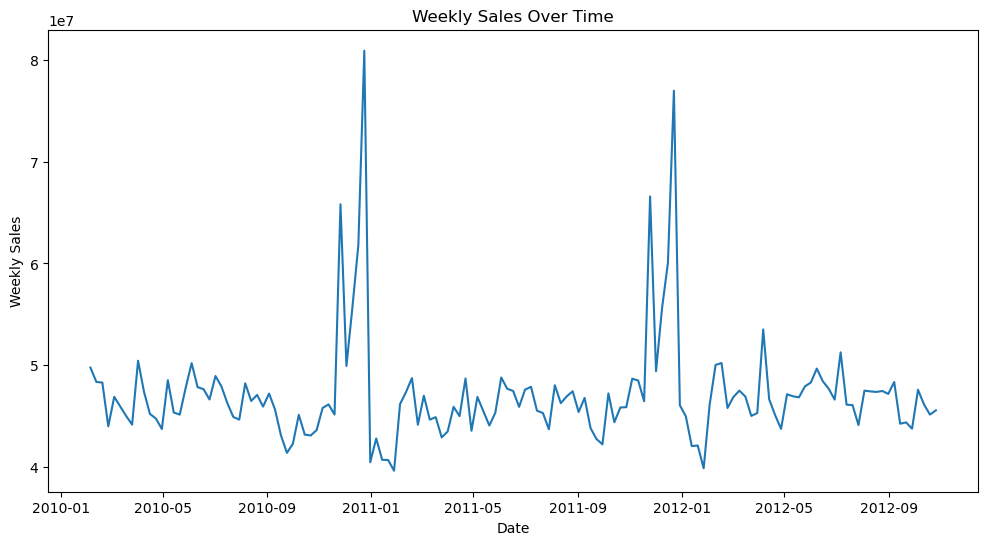

In [2]:
import matplotlib.pyplot as plt

train = train.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')
train = train.merge(stores, on='Store', how='left')

train['Date'] = pd.to_datetime(train['Date'])

plt.figure(figsize=(12, 6))
plt.plot(train.groupby('Date')['Weekly_Sales'].sum())
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


# Data preprocessing

In [4]:
from sklearn.preprocessing import MinMaxScaler


train.fillna(method='ffill', inplace=True)  

scaler = MinMaxScaler(feature_range=(0, 1))
train['Weekly_Sales'] = scaler.fit_transform(train[['Weekly_Sales']])

train['Weekly_Sales_Lag1'] = train.groupby('Store')['Weekly_Sales'].shift(1)
train['Weekly_Sales_Lag2'] = train.groupby('Store')['Weekly_Sales'].shift(2)
train['Weekly_Sales_Lag3'] = train.groupby('Store')['Weekly_Sales'].shift(3)
train.dropna(inplace=True)


train['Week'] = train['Date'].dt.isocalendar().week
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year
train['Day'] = train['Date'].dt.day

print(train.head())


    Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
95      1     1 2011-12-02      0.043379      False        48.91       3.172   
96      1     1 2011-12-09      0.054857      False        43.93       3.158   
97      1     1 2011-12-16      0.072716      False        51.63       3.159   
98      1     1 2011-12-23      0.074171      False        47.96       3.112   
99      1     1 2011-12-30      0.040596       True        44.55       3.129   

    MarkDown1  MarkDown2  MarkDown3  ...  Unemployment  Type    Size  \
95    5629.51      68.00    1398.11  ...         7.866     A  151315   
96    4640.65      19.00     105.02  ...         7.866     A  151315   
97    5011.32      67.00     347.37  ...         7.866     A  151315   
98    2725.36      40.48     634.70  ...         7.866     A  151315   
99    5762.10   46011.38     260.36  ...         7.866     A  151315   

    Weekly_Sales_Lag1 Weekly_Sales_Lag2  Weekly_Sales_Lag3  Week  Month  Year  \
95   

/var/folders/xs/xpsjvxwd1dn71l6wcvr0hb8c0000gn/T/ipykernel_33301/2206191021.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method='ffill', inplace=True)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# ARIMA MODEL IMPLEMENTATION

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  19.073
Date:                Thu, 30 May 2024   AIC                            -26.146
Time:                        14:47:22   BIC                             -8.411
Sample:                    02-05-2010   HQIC                           -18.940
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4730      0.058     -8.143      0.000      -0.587      -0.359
ar.L2         -0.3969      0.066     -6.013      0.000      -0.526      -0.268
ar.L3         -0.3377      0.077     -4.410      0.0

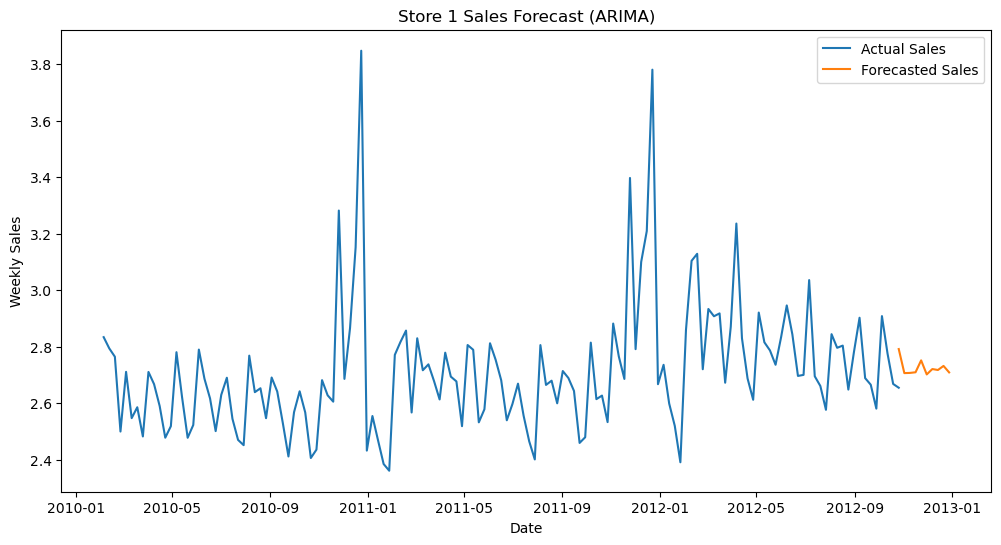

In [7]:
# Fit ARIMA model
model_arima = ARIMA(store_sales_series, order=(5, 1, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

# Forecast sales for the next 10 periods
forecast_arima = model_arima_fit.forecast(steps=10)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(store_sales_series, label='Actual Sales')
plt.plot(pd.date_range(start=store_sales_series.index[-1], periods=10, freq='W-FRI'), forecast_arima, label='Forecasted Sales')
plt.title(f'Store {store_id} Sales Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


# LSTM MODEL IMPLEMENTATION

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [11]:

def create_dataset_lstm(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

store_sales_series = train[train['Store'] == store_id]['Weekly_Sales'].values.reshape(-1, 1)

look_back = 10
X, Y = create_dataset_lstm(store_sales_series, look_back)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')


model_lstm.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test), verbose=2)


Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


254/254 - 2s - 8ms/step - loss: 2.5031e-04 - val_loss: 1.5425e-04
Epoch 2/20
254/254 - 1s - 3ms/step - loss: 1.3896e-04 - val_loss: 1.3690e-04
Epoch 3/20
254/254 - 1s - 3ms/step - loss: 1.2914e-04 - val_loss: 1.4106e-04
Epoch 4/20
254/254 - 1s - 3ms/step - loss: 1.2117e-04 - val_loss: 1.1716e-04
Epoch 5/20
254/254 - 1s - 3ms/step - loss: 1.1728e-04 - val_loss: 1.2954e-04
Epoch 6/20
254/254 - 1s - 3ms/step - loss: 1.1388e-04 - val_loss: 1.0934e-04
Epoch 7/20
254/254 - 1s - 3ms/step - loss: 1.1283e-04 - val_loss: 1.2047e-04
Epoch 8/20
254/254 - 1s - 3ms/step - loss: 1.0703e-04 - val_loss: 1.1105e-04
Epoch 9/20
254/254 - 1s - 3ms/step - loss: 1.0688e-04 - val_loss: 1.1564e-04
Epoch 10/20
254/254 - 1s - 3ms/step - loss: 1.0723e-04 - val_loss: 1.0756e-04
Epoch 11/20
254/254 - 1s - 3ms/step - loss: 1.0583e-04 - val_loss: 1.0782e-04
Epoch 12/20
254/254 - 1s - 3ms/step - loss: 1.0240e-04 - val_loss: 1.2900e-04
Epoch 13/20
254/254 - 1s - 3ms/step - loss: 9.9827e-05 - val_loss: 1.1762e-04
Epoch 

In [13]:
train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate RMSE
train_score_lstm = np.sqrt(np.mean((train_predict_lstm - Y_train[0]) ** 2))
test_score_lstm = np.sqrt(np.mean((test_predict_lstm - Y_test[0]) ** 2))
print(f'LSTM Train RMSE: {train_score_lstm}, Test RMSE: {test_score_lstm}')


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
LSTM Train RMSE: 0.056202291380803564, Test RMSE: 0.05539396258724815


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


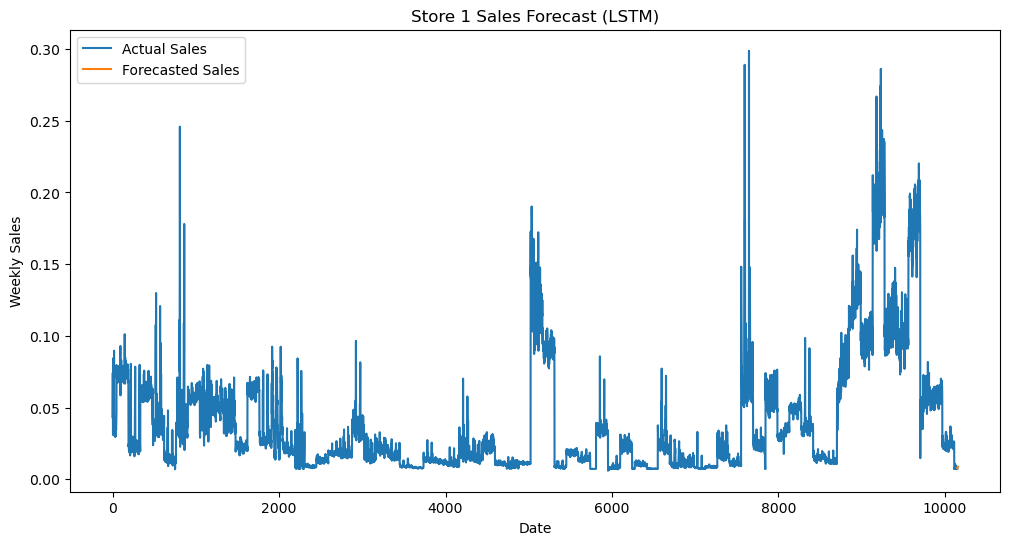

In [14]:
# Forecast future sales using LSTM
def forecast_lstm(model, data, look_back, steps=10):
    predictions = []
    last_data = data[-look_back:]
    for _ in range(steps):
        prediction = model.predict(last_data.reshape(1, look_back, 1))
        predictions.append(prediction[0, 0])
        last_data = np.append(last_data[1:], prediction)
    return predictions

future_steps = 10
future_forecast_lstm = forecast_lstm(model_lstm, store_sales_series, look_back, future_steps)
future_forecast_lstm = scaler.inverse_transform(np.array(future_forecast_lstm).reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(store_sales_series), label='Actual Sales')
plt.plot(np.arange(len(store_sales_series) - 1, len(store_sales_series) + future_steps - 1), future_forecast_lstm, label='Forecasted Sales')
plt.title(f'Store {store_id} Sales Forecast (LSTM)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


# Hypermater tuning for ARIMA model using grid search

In [23]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(store_sales_series, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

print(f'Best ARIMA order: {best_pdq} with AIC: {best_aic}')


Best ARIMA order: (2, 1, 1) with AIC: -66756.08576419135


# Hypermater tuning for LSTM model using random search

In [41]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner  import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                          return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32)))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='hptuning'
)

tuner.search(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 2 Complete [00h 00m 00s]

Best val_loss So Far: None
Total elapsed time: 00h 00m 01s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
512               |320               |units
0.2               |0.1               |dropout



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/li

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py", line 114, in check_data_cardinality
    raise ValueError(msg)
ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 8110
'y' sizes: 1

